<a href="https://colab.research.google.com/github/Himm11/NeuralNetwork-Lab/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LAB 3: REGRESSION
Submitted by: Himadri Singh

In [ ]:
import torch
import sklearn
import pandas as pd
import numpy as np

In [ ]:
# Make a Toy Dataset
df = pd.read_csv("/content/winequality-red.csv")
a=df[["fixed acidity","volatile acidity","citric acid","alcohol"]]
a=a.iloc[0:100]
print(a)

b=df[["quality"]]
b=b.iloc[0:100]
print(b)

X = torch.tensor(a.values.astype(np.float32))
y = torch.tensor(b.values.astype(np.float32))

    fixed acidity  volatile acidity  citric acid  alcohol
0             7.4             0.700         0.00      9.4
1             7.8             0.880         0.00      9.8
2             7.8             0.760         0.04      9.8
3            11.2             0.280         0.56      9.8
4             7.4             0.700         0.00      9.4
..            ...               ...          ...      ...
95            4.7             0.600         0.17     12.9
96            6.8             0.775         0.00     10.7
97            7.0             0.500         0.25      9.2
98            7.6             0.900         0.06      9.8
99            8.1             0.545         0.18      9.0

[100 rows x 4 columns]
    quality
0         5
1         5
2         5
3         6
4         5
..      ...
95        6
96        5
97        5
98        5
99        6

[100 rows x 1 columns]


In [ ]:
# Data Shffling
torch.manual_seed(10)
suffle_idx=torch.randperm(y.size(0),dtype=torch.long)
X,y=X[suffle_idx],y[suffle_idx]
suffle_idx[:10]

#suffle_idx is number between range 0 and size(y)-1
#It is used as index with numbers in an undefined pattern and is used to shuffle x and y

tensor([37, 13, 90, 47,  4, 40, 17, 92, 41, 60])

In [ ]:
# Train Test split
train_size=int(suffle_idx.size(0)*0.8)
train_idx= suffle_idx[:train_size]
test_idx=suffle_idx[train_size:]
X_train,y_train=X[train_idx],y[train_idx]
X_test,y_test=X[test_idx],y[test_idx]

In [ ]:
# Normalize
mean,std_dev=X_train.mean(dim=0) ,X_train.std(dim=0)
X_train=(X_train-mean)/std_dev
X_test=(X_test-mean)/std_dev


In [ ]:
import torch.nn as nn
from torch.autograd import grad

In [ ]:
class NN():
  def __init__(self,n_features):
    self.n_features=n_features
    self.weight=torch.zeros(size=(n_features,1),dtype=torch.float,requires_grad=True)
    self.bias=torch.zeros(1,dtype=torch.float,requires_grad=True)


  def forward(self,x):
    output=torch.add(torch.mm(x,self.weight),self.bias)
    return output.view(-1)

def loss_fn(yhat,y):
  return torch.mean((yhat-y)**2)


In [ ]:
def train(model,x,y,n_epoch=10,lr=0.01,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:

      yhat=model.forward(x[idx])

      loss=loss_fn(yhat,y[idx])

      grad_w=grad(loss,model.weight,retain_graph=True)[0]
      grad_b=grad(loss,model.bias)[0]

      model.weight=model.weight-lr*grad_w
      model.bias=model.bias-lr*grad_b

    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)

  return cost




In [ ]:
model=NN(X_train.size(1))
cost=train(model,X_train,y_train,n_epoch=150)

Epoc:   1 | MSE  25.70335
Epoc:   2 | MSE  23.74044
Epoc:   3 | MSE  21.93131
Epoc:   4 | MSE  20.25554
Epoc:   5 | MSE  18.71199
Epoc:   6 | MSE  17.29063
Epoc:   7 | MSE  15.98227
Epoc:   8 | MSE  14.77558
Epoc:   9 | MSE  13.67229
Epoc:  10 | MSE  12.64757
Epoc:  11 | MSE  11.69199
Epoc:  12 | MSE  10.81402
Epoc:  13 | MSE  9.99898
Epoc:  14 | MSE  9.25268
Epoc:  15 | MSE  8.57074
Epoc:  16 | MSE  7.93675
Epoc:  17 | MSE  7.35485
Epoc:  18 | MSE  6.81807
Epoc:  19 | MSE  6.31774
Epoc:  20 | MSE  5.85643
Epoc:  21 | MSE  5.43244
Epoc:  22 | MSE  5.03651
Epoc:  23 | MSE  4.68577
Epoc:  24 | MSE  4.35358
Epoc:  25 | MSE  4.05371
Epoc:  26 | MSE  3.76908
Epoc:  27 | MSE  3.50615
Epoc:  28 | MSE  3.26172
Epoc:  29 | MSE  3.04244
Epoc:  30 | MSE  2.83609
Epoc:  31 | MSE  2.64838
Epoc:  32 | MSE  2.47266
Epoc:  33 | MSE  2.30908
Epoc:  34 | MSE  2.16006
Epoc:  35 | MSE  2.02823
Epoc:  36 | MSE  1.90103
Epoc:  37 | MSE  1.78575
Epoc:  38 | MSE  1.67927
Epoc:  39 | MSE  1.57755
Epoc:  40 | M

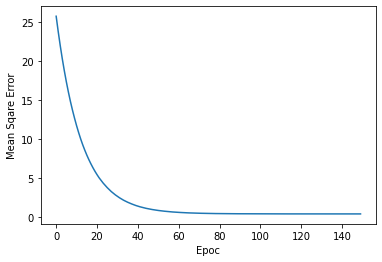

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)),cost)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.show()

In [ ]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model.forward(X_train)
train_acc=torch.mean((
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))


Training Accuracy: 94.31
Testing Accuracy: 95.00
